In [1]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import requests
import json
import random
import warnings
import time
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import plotly.express as px
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv (r'D:\cars.csv')

In [3]:
df.reset_index(inplace = True)#index reset after dealing with outliers
df

,index,Unnamed: 0,Unnamed: 0.1,modle,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,car_id
0,0,0,0,אאודי A4,40000,220000.0,ידנית,1984,2005,4.0,פרטית,פרטית,אזור באר שבע והסביבה,2230947
1,1,1,1,אאודי A4,20900,131000.0,אוטומטית,1984,2006,2.0,פרטית,פרטית,אזור באר שבע והסביבה,2234559
2,2,3,3,אאודי A4,38000,195000.0,אוטומטית,1984,2006,4.0,פרטית,פרטית,אזור פתח תקוה והסביבה,2254306
3,3,4,4,אאודי A4,5000,218073.0,אוטומטית,1781,2006,3.0,פרטית,פרטית,אזור רמלה - לוד,2237862
4,4,7,7,אאודי A6,17000,200000.0,אוטומטית,2393,2006,3.0,פרטית,פרטית,אזור נתניה והסביבה,2252216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,7802,8749,10406,רנו מגאן,85000,92500.0,אוטומטית,1461,2019,1.0,אין,פרטית,אזור נס ציונה - רחובות,2254660
7803,7803,8750,10407,רנו מגאן,95000,28000.0,אוטומטית,1461,2020,3.0,פרטית,פרטית,אזור נס ציונה - רחובות,2230624
7804,7804,8751,10408,רנו מגאן,102000,28000.0,אוטומטית,1332,2019,1.0,אין,פרטית,אזור עכו - נהריה,2252687
7805,7805,8752,10409,רנו מגאן,98000,60000.0,אוטומטית,1332,2019,1.0,אין,פרטית,אזור חיפה וחוף הכרמל,2252117


### changing current and last owner to numeric variable

In [4]:
df = df.replace('ידנית','0', regex=True)
df = df.replace('אוטומטית','1', regex=True)
df = df.replace('פרטית','1', regex=True)
df = df.replace('ליסינג','0', regex=True)
df = df.replace('אין','2', regex=True)

### changing city to numeric variable

In [5]:
city_df=df.drop_duplicates(subset='city').copy()

In [6]:
lst=[]
for i in city_df.city:
    lst.append(i)

In [7]:
count =0
for i in lst:
    df = df.replace(i,count, regex=True)
    count+=1

### creating a generic brand coulm and changing it to a numeric variable

In [8]:
brand=[]

for i in range(0,7807):
    k = df.modle[i].split()
    brand.append(k[0])
print(len(brand))

7807


In [9]:
df.insert(0, 'brand', brand)
df.head(5)

,brand,index,Unnamed: 0,Unnamed: 0.1,modle,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,car_id
0,אאודי,0,0,0,אאודי A4,40000,220000.0,0,1984,2005,4.0,1,1,0,2230947
1,אאודי,1,1,1,אאודי A4,20900,131000.0,1,1984,2006,2.0,1,1,0,2234559
2,אאודי,2,3,3,אאודי A4,38000,195000.0,1,1984,2006,4.0,1,1,1,2254306
3,אאודי,3,4,4,אאודי A4,5000,218073.0,1,1781,2006,3.0,1,1,2,2237862
4,אאודי,4,7,7,אאודי A6,17000,200000.0,1,2393,2006,3.0,1,1,3,2252216


In [10]:
brand_df=df.drop_duplicates(subset='brand').copy()

In [11]:
brand_lst=[]
for i in brand_df.brand:
    brand_lst.append(i)

In [12]:
count =0
for i in brand_lst:
    df = df.replace(i,count, regex=True)
    count+=1
df.head(5)

,brand,index,Unnamed: 0,Unnamed: 0.1,modle,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,car_id
0,0,0,0,0,0,40000,220000.0,0,1984,2005,4.0,1,1,0,2230947
1,0,1,1,1,0,20900,131000.0,1,1984,2006,2.0,1,1,0,2234559
2,0,2,3,3,0,38000,195000.0,1,1984,2006,4.0,1,1,1,2254306
3,0,3,4,4,0,5000,218073.0,1,1781,2006,3.0,1,1,2,2237862
4,0,4,7,7,0,17000,200000.0,1,2393,2006,3.0,1,1,3,2252216


### creating a new numeric coulm for brand category of each car 

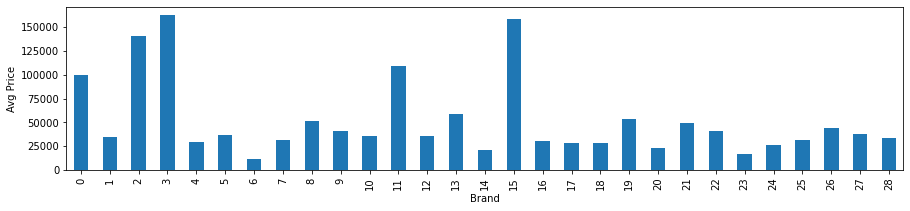

In [13]:
df_comp_avg_price = df[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price")
plt.show()

#### from this graph we divided the brand catagory into 3 sub categories
under 15000 is Budget/0
between 15000 to 70000 Mid_Range/1
over 70000 Luxury

In [14]:
df = df.merge(df_comp_avg_price, on = 'brand')

In [15]:
df['brand_category'] = df['brand_avg_price'].apply(lambda x : 0 if x < 15000 
                                                     else (1 if 15000 <= x < 70000
                                                           else 2))

In [16]:
df = df.drop('index', 1)
df = df.drop('Unnamed: 0', 1)
df = df.drop('Unnamed: 0.1', 1)

In [17]:
df.to_csv(r'D:\cars.csv')

variables
numeric
stick:
    0 - ידני
    1 - אוטומט
last_owner
    0 - פרטי
    1 - ליסינג
    2 - אין
curr_owner
    0 - פרטי
    1 - ליסינג
city

Ordinal:
hand 
    1 - יד ראשונה
    2 - יד שניה
    3 - יד שלישית
    4 - יד רביעית
    5 - יד חמישית



city:        
0 -    אזור באר שבע והסביבה
1 -   אזור פתח תקוה והסביבה
2 -    אזור רמלה - לוד
3 -    אזור נתניה והסביבה
4 -    אזור ירושלים והסביבה
5 -    אזור תל אביב
6 -    אזור גדרה יבנה והסביבה
7 -    אזור מושבים בשרון
8 -    אזור בית שמש והסביבה
9 -    אזור מושבים בצפון
10 -    אזור ראשל"צ והסביבה
11 -    אזור אשדוד - אשקלון
12 -    אזור עכו - נהריה
13 -    אזור בקעת אונו
14 -    אזור כרמיאל והסביבה
15 -    אזור עמק יזרעאל
16 -    אזור רמת גן - גבעתיים
17 -    אזור חיפה וחוף הכרמל
18 -    אזור קריות
19 -    אזור זכרון - בנימינה
20 -    אזור רמת השרון - הרצליה
21 -    אזור יישובי השומרון
22 -    אזור גליל ועמקים
23 -    אזור נס ציונה - רחובות
24 -    אזור חולון - בת ים
25 -    אזור רעננה - כפר סבא
26 -    אזור טבריה והסביבה
27 -    אזור מושבים במרכז
28 -    אזור מושבים בדרום
29 -    אזור מושבים בשפלה
30 -    אזור קיסריה והסביבה
31 -    אזור מודיעין והסביבה
32 -    אזור חדרה וישובי עמק חפר
33 -    אזור הוד השרון והסביבה
34 -    אזור אילת והערבה
35 -    אזור אזור דרום
36 -    אזור מושבים באזור ירושלים
BRAND:
0-אאודי
1-אופל
2- אינפיניטי
3- ב.מ.וו
4- ביואיק
5- דאצ’יה
6- דייהטסו
7- הונדה
8- וולוו
9- טויוטה
10- יונדאי
11- לקסוס
12- מאזדה
13- מיני
14- מיצובישי
15- מרצדס
16- ניסאן
17- סובארו
18- סוזוקי
19- סיאט
20- סיטרואן
21- סקודה
22- פולקסווגן
23- פורד
24- פיאט
25- פיג’ו
26- קיה
27- קרייזלר
28- רנו